# Python and Scikit-Learn

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

What we're gonna cover:

0. An end-to-end Scikit-Learn workflow 
1. Getting data ready
2. Choose the right estimator/algorithm for our predictions on our data
3. Fit the model/algorithm and use it ti make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model 
7. Putting it all together`

In [1]:
what_were_covering = [
    '0. An end-to-end Scikit-Learn workflow', 
    '1. Getting data ready',
    '2. Choose the right estimator/algorithm for our predictions on our data',
    '3. Fit the model/algorithm and use it ti make predictions on our data',
    '4. Evaluating a model', 
    '5. Improve a model',
    '6. Save and load a trained model', 
    '7. Putting it all together'
]

In [2]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## An end-to-end Scikit-Learn workflow 

In [3]:
# 1. Get the data ready 
heart_disease = pd.read_csv("data/intro/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [5]:
# 2. Choose the right estimator/algorithm for our predictions on our data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# We'll keep default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model/algorithm and use it ti make predictions on our data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
# make a prediction
y_preds = clf.predict(X_test)
y_preds, y_test

(array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64),
 282    0
 70     1
 9      1
 65     1
 207    0
       ..
 40     1
 42     1
 114    1
 144    1
 149    1
 Name: target, Length: 61, dtype: int64)

In [9]:
# 4. Evaluate the model on the trainig data and test data
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8360655737704918

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76        23
           1       0.83      0.92      0.88        38

    accuracy                           0.84        61
   macro avg       0.84      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[16,  7],
       [ 3, 35]], dtype=int64)

In [13]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [14]:
# 5. Improve a model
# Try differrent amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Module accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%\n")
        

Trying model with 10 estimators...
Module accuracy on test set: 75.41%

Trying model with 20 estimators...
Module accuracy on test set: 83.61%

Trying model with 30 estimators...
Module accuracy on test set: 78.69%

Trying model with 40 estimators...
Module accuracy on test set: 83.61%

Trying model with 50 estimators...
Module accuracy on test set: 85.25%

Trying model with 60 estimators...
Module accuracy on test set: 83.61%

Trying model with 70 estimators...
Module accuracy on test set: 81.97%

Trying model with 80 estimators...
Module accuracy on test set: 83.61%

Trying model with 90 estimators...
Module accuracy on test set: 85.25%



In [15]:
# 6. Save a model and load it
import pickle

np.random.seed(42)
pickle.dump(RandomForestClassifier(n_estimators=20).fit(X_train, y_train), open("data/data-analysis/random_forest_model_1.pkl", "wb+"))

In [16]:
load_model = pickle.load(open("data/data-analysis/random_forest_model_1.pkl", "rb"))
load_model.score(X_test, y_test)

0.8032786885245902

In [17]:
import sklearn
sklearn.show_versions()


System:
    python: 3.11.3 | packaged by Anaconda, Inc. | (main, Apr 19 2023, 23:46:34) [MSC v.1916 64 bit (AMD64)]
executable: D:\Programs\miniconda\envs\is\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
      sklearn: 1.2.2
          pip: 23.0.1
   setuptools: 66.0.0
        numpy: 1.24.3
        scipy: 1.10.1
       Cython: None
       pandas: 1.5.3
   matplotlib: 3.7.1
       joblib: 1.1.1
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: D:\Programs\miniconda\envs\is\Library\bin\mkl_rt.1.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2021.4-Product
    num_threads: 6
threading_layer: intel

       filepath: D:\Programs\miniconda\envs\is\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 12


## 1. Getting the data ready

Data doesn't always come ready to use with a Scikit-Learn machine learning model.

Three of the main steps you'll often have to take are:
* Splitting the data into features (usually `X`) and labels (usually `y`)
* Filling (also called imputing) or disregarding missing values
* Converting non-numerical values to numerical values (also call feature encoding)

Let's see an example.

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X = heart_disease.drop("target", axis=1)
X.tail(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [20]:
y = heart_disease["target"]
y.tail(2)

301    0
302    0
Name: target, dtype: int64

In [21]:
# Split the data into trainig and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, len(heart_disease), f"242 + 61 = {242 + 61}"

((242, 13), (61, 13), (242,), (61,), 303, '242 + 61 = 303')

### 1.1 Make sure it's all numerical

In [23]:
car_sales = pd.read_csv("data/sklearn-data/car-sales-extended.csv")
car_sales.tail(2)

,Make,Colour,Odometer (KM),Doors,Price
998,Honda,White,215883,4,4001
999,Toyota,Blue,248360,4,12732


In [27]:
# Split into X/y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, y_train

(       Make Colour  Odometer (KM)  Doors
 719  Toyota  White          10217      4
 554   Honda  White         113704      4
 267   Honda   Blue         136392      4
 266   Honda  Black         237861      4
 196   Honda   Blue          78153      4
 ..      ...    ...            ...    ...
 617  Nissan   Blue         249860      4
 207  Nissan  Black         125251      4
 310  Toyota   Blue          52054      4
 302   Honda   Blue         230570      4
 286   Honda  White         224292      4
 
 [700 rows x 4 columns],
 719    22883
 554    23280
 267    12146
 266    10374
 196    10316
        ...  
 617    14524
 207    18306
 310    10888
 302    10676
 286     6431
 Name: Price, Length: 700, dtype: int64)

In [28]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [29]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")
transform_X = transformer.fit_transform(X)
transform_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transform_X).head(10), X.head(10)

(    0    1    2    3    4    5    6    7    8    9    10   11        12
 0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
 1  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
 2  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
 3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
 4  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
 5  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0   42652.0
 6  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  163453.0
 7  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   43120.0
 8  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  130538.0
 9  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   51029.0,
      Make Colour  Odometer (KM)  Doors
 0   Honda  White          35431      4
 1     BMW   Blue         192714      5
 2   Honda  White          84714      4
 3  Toyota  White         154365    

In [31]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [32]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
model.score(X_test, y_test)

0.3235867221569877

### What if there were missing values?

Many machine learning models don't work well when there are missing values in the data.

There are two main options when dealing with missing values.

1. Fill them with some given value. For example, you might fill missing values of a numerical column with the mean of all the other values. The practice of filling missing values is often referred to as imputation.
2. Remove them. If a row has missing values, you may opt to remove them completely from your sample completely. However, this potentially results in using less data to build your model.

**Note:** Dealing with missing values is a problem to problem issue. And there's often no best way to do it.

In [34]:
# Import car_sales missing data
car_sales_missing = pd.read_csv("data/sklearn-data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
# Split into X/y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Spliting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [36]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

categorical_features = ["Make", "Colour", "Doors"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")
# transform_X = transformer.fit_transform(X)
# transform_X

categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')
            ), ('encoder', OneHotEncoder())])

transformer = ColumnTransformer(transformers=[
    ('categorical_transformer', categorical_transformer, [0])
],
                                remainder="passthrough")
transform_X = transformer.fit_transform(X)
transform_X

array([[0.0, 1.0, 0.0, ..., 'White', 35431.0, 4.0],
       [1.0, 0.0, 0.0, ..., 'Blue', 192714.0, 5.0],
       [0.0, 1.0, 0.0, ..., 'White', 84714.0, 4.0],
       ...,
       [0.0, 0.0, 1.0, ..., 'Blue', 66604.0, 4.0],
       [0.0, 1.0, 0.0, ..., 'White', 215883.0, 4.0],
       [0.0, 0.0, 0.0, ..., 'Blue', 248360.0, 4.0]], dtype=object)

In [37]:
pd.DataFrame(transform_X).head(50), X

(      0    1    2    3    4      5         6    7
 0   0.0  1.0  0.0  0.0  0.0  White   35431.0  4.0
 1   1.0  0.0  0.0  0.0  0.0   Blue  192714.0  5.0
 2   0.0  1.0  0.0  0.0  0.0  White   84714.0  4.0
 3   0.0  0.0  0.0  1.0  0.0  White  154365.0  4.0
 4   0.0  0.0  1.0  0.0  0.0   Blue  181577.0  3.0
 5   0.0  1.0  0.0  0.0  0.0    Red   42652.0  4.0
 6   0.0  0.0  0.0  1.0  0.0   Blue  163453.0  4.0
 7   0.0  1.0  0.0  0.0  0.0  White       NaN  4.0
 8   0.0  0.0  0.0  0.0  1.0  White  130538.0  4.0
 9   0.0  1.0  0.0  0.0  0.0   Blue   51029.0  4.0
 10  0.0  0.0  1.0  0.0  0.0  White  167421.0  4.0
 11  0.0  0.0  1.0  0.0  0.0  Green   17119.0  4.0
 12  0.0  0.0  1.0  0.0  0.0  White  102303.0  4.0
 13  0.0  0.0  0.0  0.0  1.0  White  134181.0  4.0
 14  0.0  1.0  0.0  0.0  0.0   Blue  199833.0  4.0
 15  0.0  0.0  0.0  1.0  0.0   Blue  205592.0  4.0
 16  0.0  0.0  0.0  1.0  0.0    Red   96742.0  4.0
 17  1.0  0.0  0.0  0.0  0.0  White  194189.0  5.0
 18  0.0  0.0  1.0  0.0  0.0  W

In [38]:
dummies = pd.get_dummies(car_sales_missing[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0,1,0,0,0,0,0,0,1
1,5.0,1,0,0,0,0,1,0,0,0
2,4.0,0,1,0,0,0,0,0,0,1
3,4.0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,1,0,0,1,0,0,0


In [39]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'White'

### 1.2.1 Fill missing data with pandas

What we'll do is fill the rows where categorical values are missing with `"missing"`, the numerical features with the mean or 4 for the doors. And drop the rows where the Price is missing. 

We could fill Price with the mean, however, since it's the target variable, we don't want to be introducing too many fake labels.

**Note:** The practice of filling missing data is called **imputation**. And it's important to remember there's no perfect way to fill missing data. The methods we're using are only one of many. The techniques you use will depend heavily on your dataset. A good place to look would be searching for "data imputation techniques".

In [40]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4, inplace=True)

# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)

# Check our dataframe
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
# Now let's one-hot encode the categorical columns (copied from above)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### 1.2.2 Filling missing data and transforming categorical data with Scikit-Learn

Now we've filled the missing columns using pandas functions, you might be thinking, "Why pandas? I thought this was a Scikit-Learn introduction?".

Not to worry, scikit-learn provides another method called [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) which allows us to do a similar thing.

`SimpleImputer()` transforms data by filling missing values with a given strategy.

And we can use it to fill the missing values in our DataFrame as above.

At the moment, our dataframe has no mising values.

In [42]:
# Reimport the DataFrame
car_sales_missing = pd.read_csv("data/sklearn-data/car-sales-extended-missing-data.csv")
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Drop the rows with missing in the "Price" column
car_sales_missing.dropna(subset=["Price"], inplace=True)

# Check our dataframe
car_sales_missing.isna().sum(), len(car_sales_missing)

(Make             47
 Colour           46
 Odometer (KM)    48
 Doors            47
 Price             0
 dtype: int64,
 950)

In [44]:
# Split into X and Y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into training and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define different column features
categorical_features = ["Make", "Colour"]
door_feature = ["Doors"]
numerical_feature = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, categorical_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, numerical_feature)])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [46]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [47]:
# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)

transformed_X_test = transformer.fit_transform(car_sales_filled_test)

# Check transformed and filled X_train
transformed_X_test.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 9.97610e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.79750e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.97664e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.08569e+05],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 2.01190e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.11630e+04]])

In [48]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed()
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)


0.21415856913675224

If this looks confusing, don't worry, we've covered a lot of ground very quickly. And we'll revisit these strategies in a future section in way which makes a lot more sense.

For now, the key takeaways to remember are:
* Most datasets you come across won't be in a form ready to immediately start using them with machine learning models. And some may take more preparation than others to get ready to use.
* For most machine learning models, your data has to be numerical. This will involve converting whatever you're working with into numbers. This process is often referred to as **feature engineering** or **feature encoding**.
* Some machine learning models aren't compatible with missing data. The process of filling missing data is referred to as **data imputation**.

## 2. Choosing the right estimator/algorithm for your problem

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:
* Sklearn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

If you know what kind of problem you're working with, one of the next places you should look at is the [Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them. If you do start to apply different algorithms but they don't seem to be working, that's when you'd start to look deeper into each one.

Let's check out the cheatsheet and follow it for some of the problems we're working on.

<img src="data/sklearn-data/sklearn-ml-map.png" width=700/>

You can see it's split into four main categories. Regression, classification, clustering and dimensionality reduction. Each has their own different purpose but the Scikit-Learn team has designed the library so the workflows for each are relatively similar.

Let's start with a regression problem (trying to predict a number). We'll use the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) built into Scikit-Learn's `datasets` module.

The goal of the California Housing dataset is to predict a given district's median house value (in hundreds of thousands of dollars) on things like the age of the home, the number of rooms, the number of bedrooms, number of people living the home and more.

### 2.1 Picking a machine learning model for a regression problem

Let's use the California Housing dataset 

In [49]:
# GEt California Housing dataset 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [50]:
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
housing_df["target"] = housing["target"]
# housing_df.drop("MedHouseVal", axis=1, inplace=True)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
# Import algorithm 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed 
np.random.seed()

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set) 
model = Ridge() 
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.6130697011852693

What if 'Ridge' didn't work or the score didn't fit our needs? 

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single)

In [53]:
# Import the RandomForestRegressor model class from the ensemble modulte 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Instantiate and fit the model (on the training set) 
model = RandomForestRegressor(n_estimators=10) 
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.7934302898307495

##  Picking a machine learning model for a classification problem

In [54]:
heart_disease = pd.read_csv("data/intro/heart-disease.csv")
heart_disease.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [55]:
# Import the class
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#Setup a random seed 
np.random.seed(42)

# Always scale the input. The most convenient way is to use a pipeline
clf = make_pipeline(StandardScaler(), SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3))

# Create the data 
X, y = heart_disease.drop("target", axis=1), heart_disease['target']

# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model on the trainig set
clf.fit(X_train, y_train)

# Score the model
clf.score(X_test, y_test)

0.819672131147541

In [56]:
# Import the class
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import RBFSampler
#Setup a random seed 
np.random.seed(42)

# Create the data 
X, y = heart_disease.drop("target", axis=1), heart_disease['target']

# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rbf_feature = RBFSampler(gamma=1, random_state=1)
X_features = rbf_feature.fit_transform(X_train)
X_features_test = rbf_feature.fit_transform(X_test)
clf = SGDClassifier(max_iter=500)
clf.fit(X_features, y_train)

# Score the model
clf.score(X_features_test, y_test)

0.45901639344262296

In [57]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Setup a random seed 
np.random.seed(42)

# Create the data 
X, y = heart_disease.drop("target", axis=1), heart_disease['target']

# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set) 
model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_features="sqrt") 
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.8688524590163934

Using the `RandomForestClassifier` we get almost double the score of `LinearSVC`.

One thing to remember, is both models are yet to receive any hyperparameter tuning. Hyperparameter tuning is fancy term for adjusting some settings on a model to try and make it better. It usually happens once you've found a decent baseline result you'd like to improve upon.

In this case, we'd probably take the `RandomForestClassifier` and try and improve it with hyperparameter tuning (which we'll see later on).

### What about the other models?

Looking at the cheat-sheet and the examples above, you may have noticed we've skipped a few.

Why?

The first reason is time. Covering every single one would take a fair bit longer than what we've done here. And the second one is the effectiveness of ensemble methods.

A little tidbit for modelling in machine learning is:
* If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.
* If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.

For this notebook, we're focused on structured data, which is why the Random Forest has been our model of choice.

If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:
* [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
* [Random Forests in Python](http://blog.yhat.com/posts/random-forests-in-python.html) by yhat
* [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen

### Experiment until something works

The beautiful thing is, the way the Scikit-Learn API is designed, once you know the way with one model, using another is much the same.

And since a big part of being a machine learning engineer or data scientist is experimenting, you might want to try out some of the other models on the cheat-sheet and see how you go. The more you can reduce the time between experiments, the better.

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the `fit()` method and passing it data, such as, `fit(X, y)`.

Where `X` is a feature array and `y` is a target array.

Other names for `X` include:
* Data
* Feature variables
* Features

Other names for `y` include:
* Labels
* Target variable

For supervised learning there is usually an `X` and `y`. For unsupervised learning, there's no `y` (no labels).

Let's revisit the example of using patient data (`X`) to predict whether or not they have heart disease (`y`).

In [58]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Setup a random seed 
np.random.seed(42)

# Create the data 
X, y = heart_disease.drop("target", axis=1), heart_disease['target']

# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set) 
model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_features="sqrt") 
model.fit(X_train, y_train)

# Check the score of the model on the test set
model.score(X_test, y_test)

0.8688524590163934

### 3.2 Make predictions using a machine learning model

Now we've got a trained model, one which has hoepfully learned patterns in the data, you'll want to use it to make predictions.

Scikit-Learn enables this in several ways. Two of the most common and useful are [`predict()`](https://github.com/scikit-learn/scikit-learn/blob/5f3c3f037/sklearn/multiclass.py#L299) and [`predict_proba()`](https://github.com/scikit-learn/scikit-learn/blob/5f3c3f037/sklearn/linear_model/_logistic.py#L1617).

Let's see them in action.

In [59]:
# Use a training model to make predictions
y_preds = model.predict(X_test)

In [60]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [61]:
np.mean(y_preds == y_test)

0.8688524590163934

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8688524590163934

### Make predictions with predict_proba()

In [63]:
# predict_proba() returns probabilities of a classification label
model.predict_proba(X_test[:5])

array([[0.91, 0.09],
       [0.45, 0.55],
       [0.46, 0.54],
       [0.87, 0.13],
       [0.24, 0.76]])

In [64]:
# Let's predict() on the same data...
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models.

In [65]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

housing = fetch_california_housing()

housing_df["target"] = housing["target"]
housing_df.head()

# Create the data 
X, y = housing_df.drop(["target"], axis=1), housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance 
model = RandomForestRegressor()

# Fit the model to the data
model.fit(X_train, y_train)

# Make predictions 
y_preds = model.predict(X_test)

In [66]:
np.array(y_preds[:10])

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [67]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [68]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## Evaluating a machine learning model 

Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

1. The `score()` method. Calling `score()` on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
2. The `scoring` parameter. This parameter can be passed to methods such as [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) or [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to tell Scikit-Learn to use a specific type of scoring metric.
3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

## 4.1 Evaluating a model with the score method 



In [69]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Setup a random seed 
np.random.seed(42)

# Create the data 
X, y = heart_disease.drop("target", axis=1), heart_disease['target']

# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set) 
model = RandomForestClassifier(n_estimators=100, criterion="entropy", max_features="sqrt") 
model.fit(X_train, y_train)

# Check the score of the model on the test set
y_preds = model.predict(X_test)

In [70]:
model.score(X_test, y_test)

0.8688524590163934

Let's use the score() on our regression problem...

In [71]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing

from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])

housing_df["target"] = housing["target"]
housing_df.head()

# Create the data 
X, y = housing_df.drop(["target"], axis=1), housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model instance 
model = RandomForestRegressor(n_estimators=10, criterion="squared_error")

# Fit the model to the data
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [72]:
model.score(X_test, y_test)

0.7869919586520553

## 4.2 Evaluating a model using the scoring parameter 

In [73]:
# Import the RandomForestClassifier model class from the ensemble module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Setup a random seed 
np.random.seed(42)

# Create the data 
X, y = heart_disease.drop("target", axis=1), heart_disease['target']

# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model (on the training set) 
model = RandomForestClassifier(n_estimators=10, criterion="entropy", max_features="sqrt") 
model.fit(X_train, y_train)

# Check the score of the model on the test set
y_preds = model.predict(X_test)

In [74]:
model.score(X_test, y_test)

0.8524590163934426

In [75]:
cross_val_score(model, X, y, cv=5)

array([0.78688525, 0.91803279, 0.78688525, 0.81666667, 0.8       ])

In [76]:
np.random.seed(42)

# Single training and test split score 
clf_single_score = model.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score 
clf_cross_val_scor = np.mean(cross_val_score(model, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_scor

(0.8524590163934426, 0.7983606557377049)

In [77]:
# Default scoring parameter of classifier = mean accuracy 
model.score(X_test, y_test)

0.8524590163934426

In [78]:
# Scoring parameter set to None by default 
cross_val_score(model, X, y, cv=5, scoring=None)

array([0.70491803, 0.83606557, 0.81967213, 0.81666667, 0.7       ])

### 4.2.1 Classification model evaluation metrics

Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Let's have a look at each of these. We'll bring down the classification code from above to go through some examples.

In [79]:
# Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create the data
X, y = heart_disease.drop("target", axis=1), heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [80]:
np.mean(cross_val_score)

0.8248087431693989

In [81]:
# Accuracy as percentage
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Accuracy: 82.48%


#### Area Under Receiver Operating Characteristic (ROC) Curve
If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:
* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the [`roc_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.

In [82]:
from sklearn.metrics import roc_curve

# Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:5]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57]])

In [83]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:5]

array([0.49, 0.83, 0.49, 0.28, 0.57])

In [84]:
# Calculate fpr, tpr and thresholds 
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

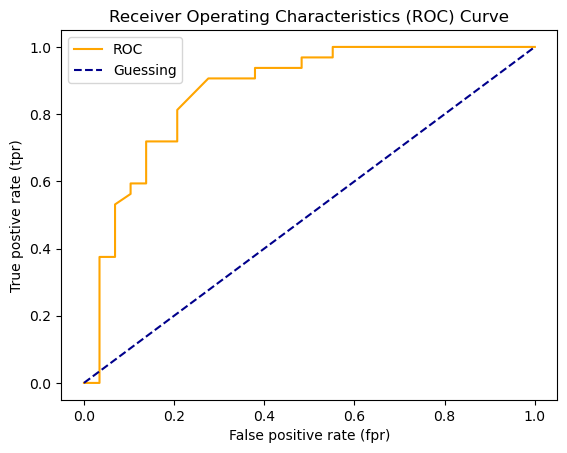

In [85]:
# Create a function for plotting ROC curves
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    # Plot roc curve 
    plt.plot(fpr, tpr, color="orange", label="ROC")
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True postive rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [86]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

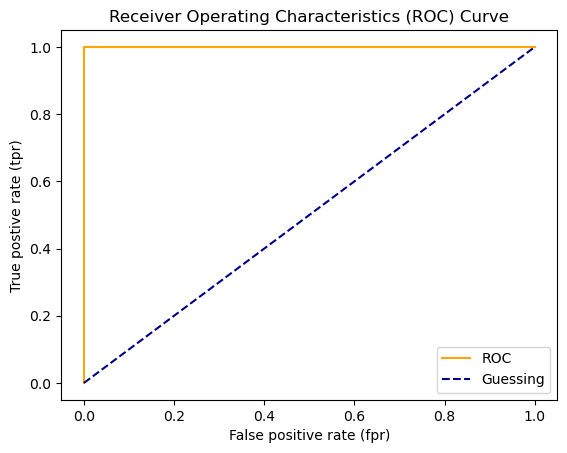

In [87]:
# Plot perfet ROC curve and AUC score 
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

In [88]:
roc_auc_score(y_test, y_test)

1.0

**Confusion matrix** 

A Confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused. 

In [89]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [90]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [91]:
# !pip install seaborn

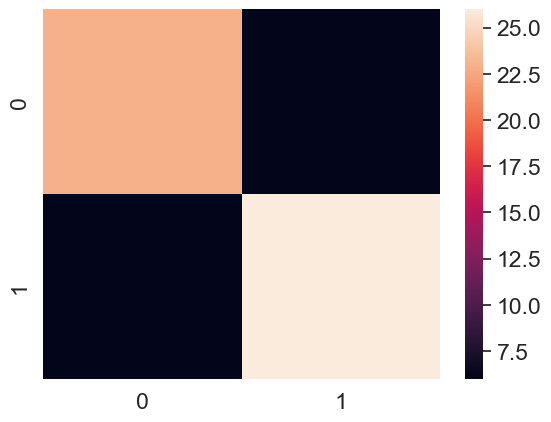

In [92]:
# Make our confusion matrix more visual with Seaborn's Heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [93]:
clf

RandomForestClassifier()

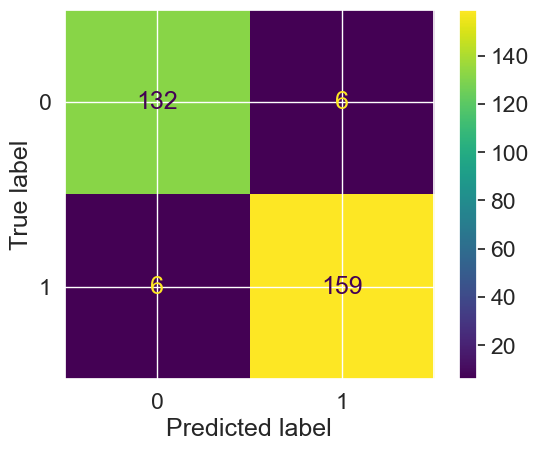

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

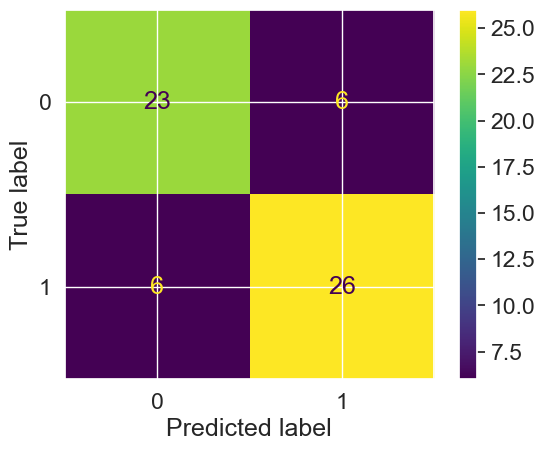

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

**Classification Report**

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:
* **Precision** - Indicates the proportion of positive identifications (model predicted class `1`) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great!
...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [97]:
# Where precision and recall vecome valuable 
disease_true = np.zeros(10000)
disease_true[:500] = 1 # only one positive case 

disease_preds = np.zeros(10000) # model predicts every case as 0
disease_preds[1] = 1

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.950095,1.000000,0.9501,0.975048,0.952590
recall,1.000000,0.002000,0.9501,0.501000,0.950100
f1-score,0.974409,0.003992,0.9501,0.489200,0.925888
support,9500.000000,500.000000,0.9501,10000.000000,10000.000000


### 4.2.2 Regression model evaluation matrix


Similar to classification, there are [several metrics you can use to evaluate your regression models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).

We'll check out the following.

1. **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 
2. **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
3. **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Let's see them in action. First, we'll bring down our regression model code again.

In [98]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
y_preds = model.predict(X_test)
model.score(X_test, y_test)

0.8065734772187598

In [100]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. 

In [101]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean 
y_test_mean = np.full(len(y_test), y_test.mean())

In [102]:
y_test_mean[:5]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [103]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

In [104]:
r2_score(y_true=y_test, y_pred=y_preds)

0.8065734772187598

**Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

In [105]:
from sklearn.metrics import mean_absolute_error 

mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [106]:
df = pd.DataFrame(data={"Actual values": y_test,
                        "Predicted values": y_preds})
df["differences"] = df["Predicted values"] - df["Actual values"]

# MAE using formulas and differences
df, np.abs(df["differences"]).mean()

(       Actual values  Predicted values  differences
 20046        0.47700          0.493840     0.016840
 3024         0.45800          0.754940     0.296940
 15663        5.00001          4.928596    -0.071414
 20484        2.18600          2.543160     0.357160
 9814         2.78000          2.331760    -0.448240
 ...              ...               ...          ...
 15362        2.63300          2.220380    -0.412620
 16623        2.66800          1.947760    -0.720240
 18086        5.00001          4.836378    -0.163632
 2144         0.72300          0.717820    -0.005180
 3665         1.51500          1.679010     0.164010
 
 [4128 rows x 3 columns],
 0.32659871732073664)

**Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

In [107]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [108]:
df["squared_differences"] = np.square(df["differences"])
df, df["squared_differences"].mean()

(       Actual values  Predicted values  differences  squared_differences
 20046        0.47700          0.493840     0.016840             0.000284
 3024         0.45800          0.754940     0.296940             0.088173
 15663        5.00001          4.928596    -0.071414             0.005100
 20484        2.18600          2.543160     0.357160             0.127563
 9814         2.78000          2.331760    -0.448240             0.200919
 ...              ...               ...          ...                  ...
 15362        2.63300          2.220380    -0.412620             0.170255
 16623        2.66800          1.947760    -0.720240             0.518746
 18086        5.00001          4.836378    -0.163632             0.026775
 2144         0.72300          0.717820    -0.005180             0.000027
 3665         1.51500          1.679010     0.164010             0.026899
 
 [4128 rows x 4 columns],
 0.2534678520824551)

In [109]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16
df_large_error.head()

,Actual values,Predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [110]:
# Calculate MSE with large error
df_large_error["squared_differences"].mean()

0.2573437523766412

In [111]:
df_large_error.iloc[1:100] = 20

In [112]:
df_large_error

,Actual values,Predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [113]:
df_large_error["squared_differences"].mean()

0.7334180712088106

### 4.2.3 Finally using a `scoring` parameter 

Woah. We've covered a bunch but haven't even touched the `scoring` parameter...

As a refresh, the `scoring` parameter can be used with a function like `cross_val_score()` to tell Scikit-Learn what evaluation metric to return using cross-validation.

Let's check it out with our classification model and the heart disease dataset.

In [114]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [115]:
np.random.seed(42)

# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [116]:
# Cross-validated accuracy 
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [117]:
np.random.seed(42) 

# Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [118]:
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is: 83.30%


In [119]:
# Recall
np.random.seed(42) 
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is: 85.45%


In [120]:
# F1
np.random.seed(42) 
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated f1 is: {np.mean(cv_f1)*100:.2f}%")

The cross-validated f1 is: 84.27%


Let's see the scoring parameter being using a regression problem...

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis=1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators=100)

In [122]:
# R2
np.random.seed(42) 
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None)
print(f"The cross-validated r2 is: {np.mean(cv_r2)*100:.2f}%")

The cross-validated r2 is: 65.45%


In [123]:
# Mean squared error 
np.random.seed(42) 
cv_mae = cross_val_score(model, X, y, cv=3, scoring="neg_mean_squared_error")
print(f"The cross-validated mae is: {np.mean(cv_mae)}")

The cross-validated mae is: -0.46141356443710196


In [124]:
# Mean absolute error
np.random.seed(42) 
cv_mse = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
print(f"The cross-validated mse is: {np.mean(cv_mse)}")

The cross-validated mse is: -0.4835773816036823


## 4.3 Using defferent evaluation metrics as Scikit-Learn functions


Remember the third way of evaluating Scikit-Learn functions?

> 3. Problem-specific metric functions. Similar to how the `scoring` parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.

Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

They all work by comparing an array of predictions, usually called `y_preds` to an array of actual labels, usually called `y_test` or `y_true`.

#### Classification functions
For:
* Accuracy we can use [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
* Precision we can use [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
* Recall we can use [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
* F1 we can use [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y 
heart_disease = pd.read_csv("data/intro/heart-disease.csv")
X, y = heart_disease.drop("target", axis=1), heart_disease["target"]

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Predict target on the test set
y_preds = clf.predict(X_test)

# Evaluate the model using evaluation functions
print(f"Accuracy score: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision score: {precision_score(y_test, y_preds)}")
print(f"Recall score: {recall_score(y_test, y_preds)}")
print(f"F1 score: {f1_score(y_test, y_preds)}")

Accuracy score: 85.25%
Precision score: 0.8484848484848485
Recall score: 0.875
F1 score: 0.8615384615384615


In [126]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

np.random.seed(42)

# Get California Housing dataset 
housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["target"] = housing["target"]

# Create X & y 
X, y = housing_df.drop("target", axis=1), housing_df["target"]

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

# Predict target on the test set
y_preds = model.predict(X_test)

# Evaluate the model using evaluation functions
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE score: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE score: {mean_squared_error(y_test, y_preds)}")

R2 score: 0.8065734772187598
MAE score: 0.32659871732073664
MSE score: 0.2534678520824551


In [127]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting data ready',
 '2. Choose the right estimator/algorithm for our predictions on our data',
 '3. Fit the model/algorithm and use it ti make predictions on our data',
 '4. Evaluating a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 5. Improving a model

First predictions = baseline predictions 
First model = baseline model

From a data perspective:
* Could we collect more data?
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?


Hyperparameters vs Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve it's ability to find patterns

In [128]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Three ways to adjust hyperparameters:
1. By hand.
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV 

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets training, validation and test

We're going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [129]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on
    a classification model.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Accuracy score: {accuracy*100:.2f}%")
    print(f"Precision score: {precision:.2f}")
    print(f"Recall score: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    return metric_dict

In [130]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shaffle the data 
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split unto X & y
X, y = heart_disease_shuffled.drop("target", axis=1), heart_disease_shuffled["target"]

# Split the data into train, validation & test sets 
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test =  X[valid_split:], y[valid_split:]

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make baseline predictions 
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy score: 82.22%
Precision score: 0.81
Recall score: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [131]:
# Make baseline predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_test, y_preds)

Accuracy score: 80.43%
Precision score: 0.83
Recall score: 0.80
F1 score: 0.82


In [132]:
np.random.seed(42)

# Create a second classifier with different hyperparameters 
clf_2 = RandomForestClassifier(n_estimators=100, max_depth=9)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier on validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy score: 84.44%
Precision score: 0.85
Recall score: 0.88
F1 score: 0.86


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

In [133]:
np.random.seed(42)

# Create a second classifier with different hyperparameters 
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=9, max_features='log2')
clf_3.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 3nd classifier on validation set
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)
clf_3_metrics

Accuracy score: 84.44%
Precision score: 0.85
Recall score: 0.88
F1 score: 0.86


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

In [134]:
# Make predictions with different hyperparameters
y_preds_test = clf_3.predict(X_test)

evaluate_preds(y_test, y_preds_test)

Accuracy score: 84.78%
Precision score: 0.88
Recall score: 0.84
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.88, 'recall': 0.84, 'f1': 0.86}

### 5.2 Hyperparameter tuning with [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Scikit-Learn's [`RandomizedSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

Let's see it in action.

First, we create a grid (dictionary) of hyperparameters we'd like to search over.

In [154]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Hyperparameter grid RandomizedSearchCV will search over
grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

# Shaffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split unto X & y
X, y = heart_disease_shuffled.drop("target",
                                   axis=1), heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10,  # number of models to try
    cv=5,
    verbose=2,
    random_state=42, # set random_state to 42 for reproducibility
    refit=True) # set refit=True (default) to refit the best model on the full dataset 

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   random_state=42, verbose=2)

In [136]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [137]:
# Make predictions with the best hyperparameters 
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy score: 80.33%
Precision score: 0.82
Recall score: 0.82
F1 score: 0.82


### 5.3 Hyperparameter tuning with GridSearchCV

In [138]:
grid_2 = {'n_estimators': [50, 100, 150],
          'max_depth': [30, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [2],
          'min_samples_leaf': [1, 2, 4]}

In [139]:
4*3*2*3*3*5

1080

In [140]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Shaffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split unto X & y
X, y = heart_disease_shuffled.drop("target",
                                   axis=1), heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid_2,
    cv=5,
    verbose=2,
    refit=True,
)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min

D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [141]:
gs_clf.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [142]:
# Make predictions with the best hyperparameters 
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy score: 81.97%
Precision score: 0.84
Recall score: 0.82
F1 score: 0.83


Let's compare our different models metrics 

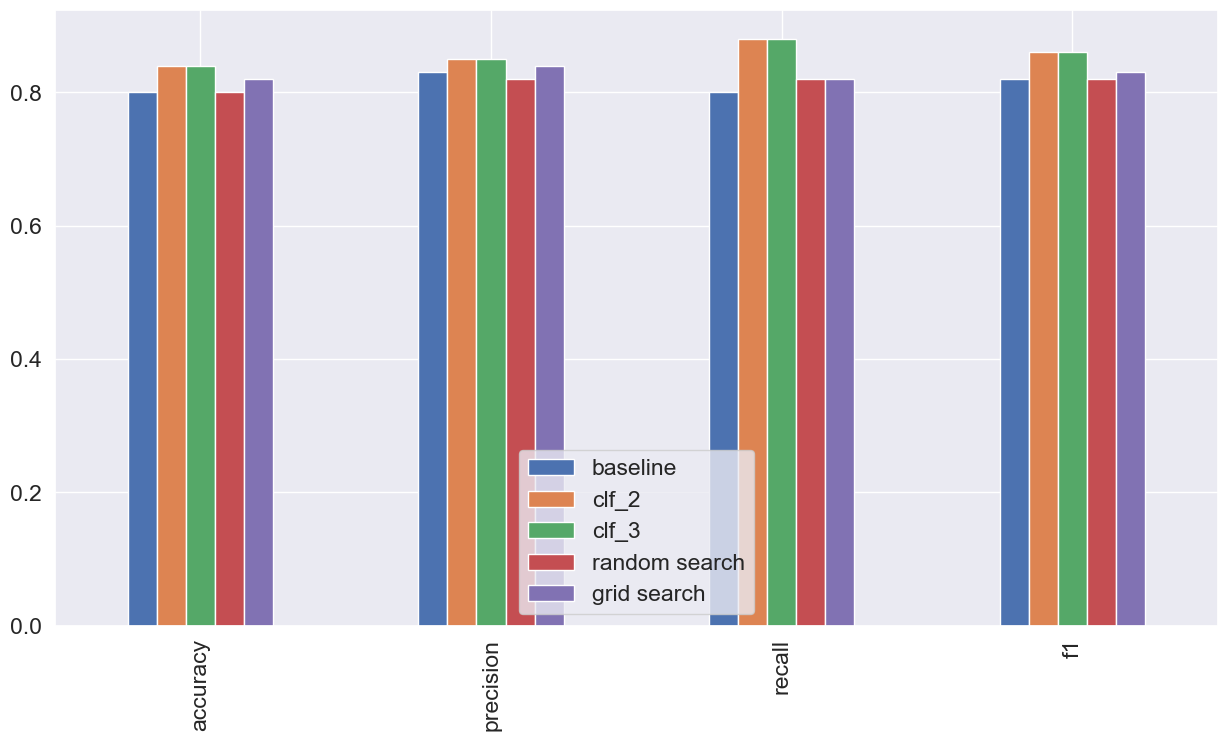

In [143]:
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "clf_2": clf_2_metrics,
    "clf_3": clf_3_metrics,
    "random search": rs_metrics,
    "grid search": gs_metrics,
})

compare_metrics.plot.bar(figsize=(15, 8));

## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` model 
2. With the `joblib` model 

**Pickle**

In [144]:
import pickle

# Save an existing model to file 
pickle.dump(gs_clf, open("data/sklearn-data/gs_random_1.pkl", "wb+"))

In [145]:
# Load a saved model 
loaded_pickle_model = pickle.load(open("data/sklearn-data/gs_random_1.pkl", "rb"))

# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy score: 81.97%
Precision score: 0.84
Recall score: 0.82
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.82, 'f1': 0.83}

**Joblib**

In [146]:
from joblib import dump, load

# Save an existing model to file 
dump(gs_clf, filename="data/sklearn-data/gs_random_1.joblib")

['data/sklearn-data/gs_random_1.joblib']

In [147]:
# Load a saved model 
loaded_joblib_model = load(filename="data/sklearn-data/gs_random_1.joblib")

# Make some predictions
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy score: 81.97%
Precision score: 0.84
Recall score: 0.82
F1 score: 0.83


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.82, 'f1': 0.83}

## 7. Putting all together 

In [148]:
data = pd.read_csv("data/sklearn-data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [149]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [150]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
1. Fill missing data
2. Convert data to numbers 
3. Build a model on the data

In [151]:
# Getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np

np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/sklearn-data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer piepline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value="missing")
            ), ("one_hot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
doors_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[("imputer",
                                       SimpleImputer(strategy="mean"))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(transformers=[("cat", categorical_transformer, categorical_features), 
                                               ("door", doors_transformer, door_feature), 
                                               ("num", numeric_transformer, numeric_feature)
                                ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor), 
                        ("model", RandomForestRegressor())])

# Split data 
X, y = data.drop("Price", axis=1), data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [152]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2, refit=True, scoring='r2')
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.5s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   2.2s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.5s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.5s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   1.5s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.5s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.5s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=median; total time=   1.4s


D:\Programs\miniconda\envs\is\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('one_hot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['auto'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             scoring='r2', verbose=2)

In [153]:
gs_y_preds = gs_model.predict(X_test)
r2_score(y_test, gs_y_preds)

0.3339554263158365